# Part one of the project
# Creating initial supervised machine learning models for predicting future stock prices

importing needed libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Fetching historical data for a specific stock (e.g., AAPL)


In [2]:
ticker = 'AAPL'  # Stock ticker symbol
data = yf.download(ticker, start='2024-09-01', end='2025-10-22')

[*********************100%%**********************]  1 of 1 completed


# Step 1: Examining the structure of the data


In [17]:
print("Head of the dataset:\n", data.head())
print("\n")
print("Information about dataset:\n", data.info())
print("\n")
print("Descriptive statistics:\n", data.describe())

Head of the dataset:
                   Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-09-03  228.550003  229.000000  221.169998  222.770004  222.525177   
2024-09-04  221.660004  221.779999  217.479996  220.850006  220.607300   
2024-09-05  221.630005  225.479996  221.520004  222.380005  222.135605   
2024-09-06  223.949997  225.240005  219.770004  220.820007  220.577332   
2024-09-09  220.820007  221.270004  216.710007  220.910004  220.667221   

              Volume  
Date                  
2024-09-03  50190600  
2024-09-04  43840200  
2024-09-05  36615400  
2024-09-06  48423000  
2024-09-09  67180000  


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 97 entries, 2024-09-03 to 2025-01-22
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       97 non-null     float64
 1   High       97 non-null     float64
 2   Low      

# Step 2: Checking for missing values

In [3]:
print("Missing values before cleaning:\n", data.isnull().sum())   # Dropping rows with missing values

data.dropna(inplace=True)
print("Missing values after cleaning:\n", data.isnull().sum())

Missing values before cleaning:
 Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
Missing values after cleaning:
 Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


# Step 3: Examining the distribution of the data


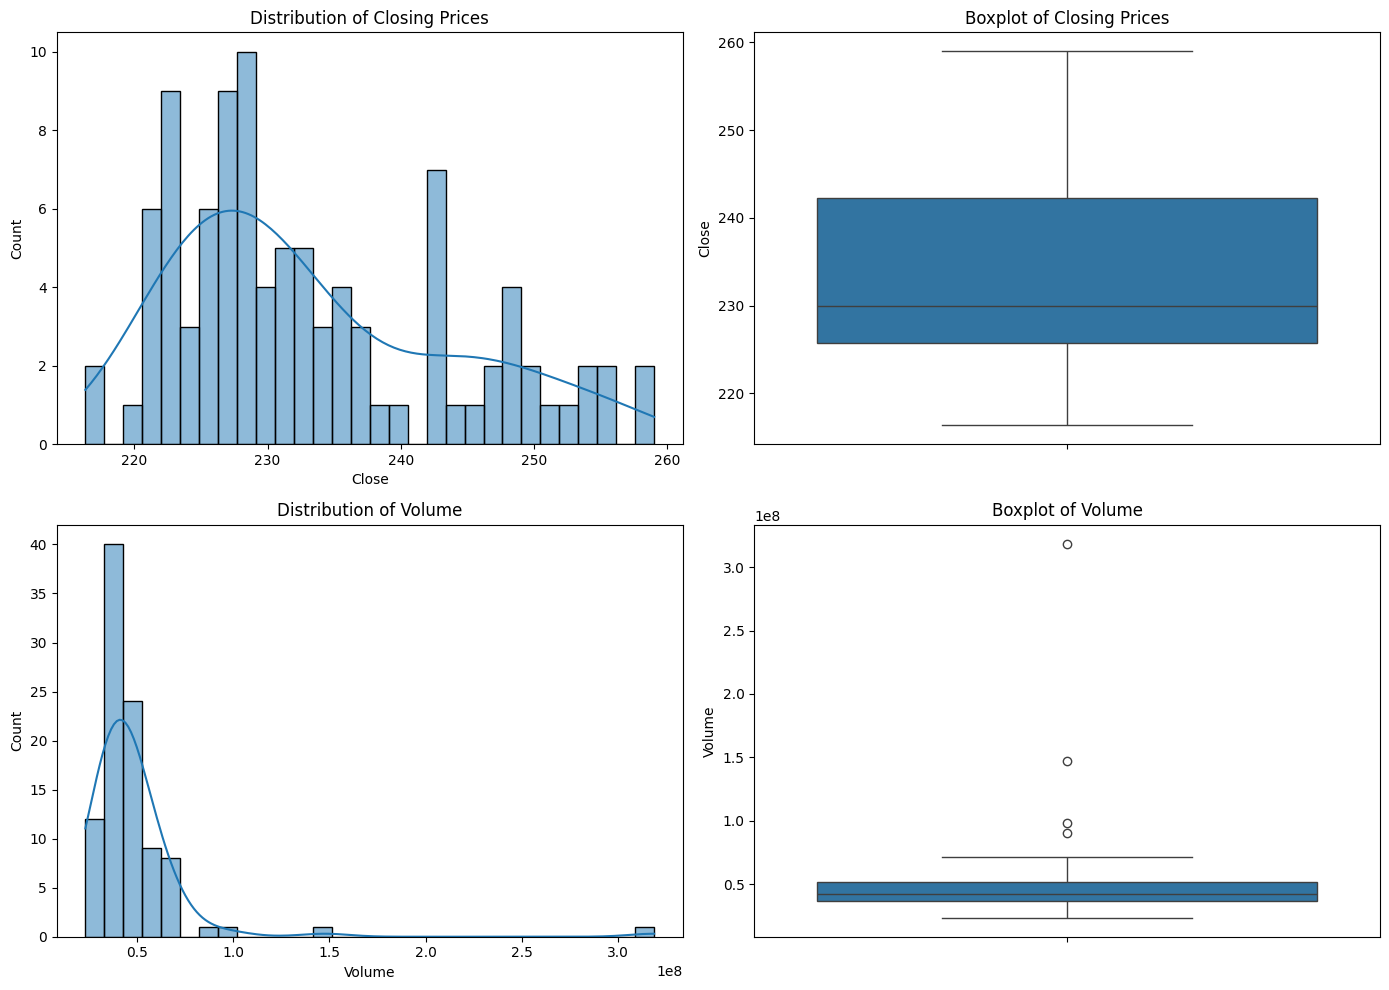

In [19]:
plt.figure(figsize=(14, 10))

# Histogram of closing prices
plt.subplot(2, 2, 1)
sns.histplot(data['Close'], bins=30, kde=True)
plt.title('Distribution of Closing Prices')

# Boxplot of closing prices
plt.subplot(2, 2, 2)
sns.boxplot(y=data['Close'])
plt.title('Boxplot of Closing Prices')

# Histogram of trading volume
plt.subplot(2, 2, 3)
sns.histplot(data['Volume'], bins=30, kde=True)
plt.title('Distribution of Volume')

# Boxplot of trading volume
plt.subplot(2, 2, 4)
sns.boxplot(y=data['Volume'])
plt.title('Boxplot of Volume')

plt.tight_layout()
plt.show()

# Step 4: Checking for correlation

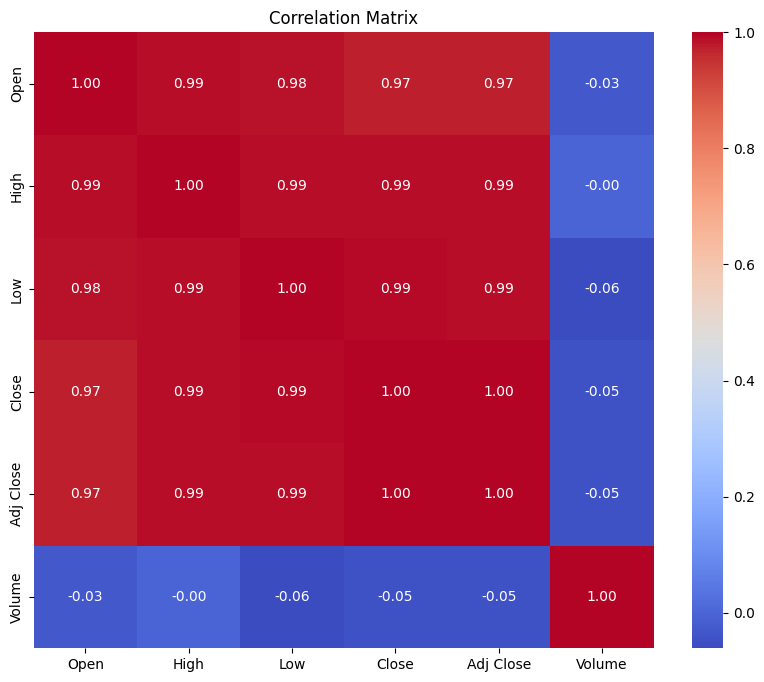

In [20]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Step 5: Examining trends and patterns  

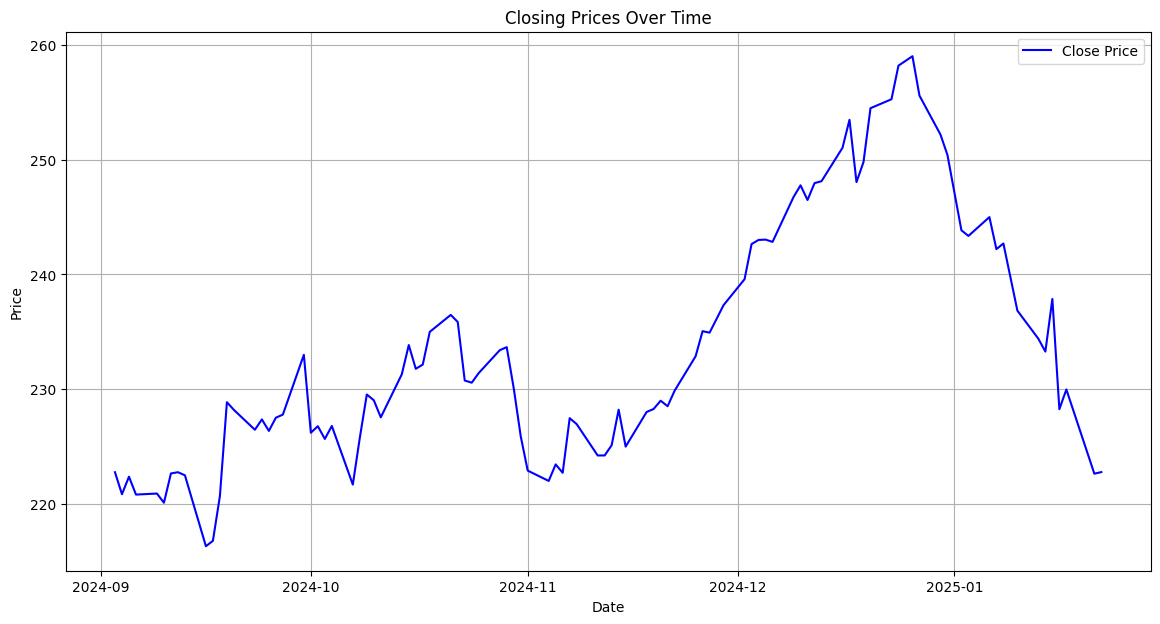

In [21]:
plt.figure(figsize=(14, 7))

# Closing price over time
plt.plot(data.index, data['Close'], label='Close Price', color='blue')
plt.title('Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()


# Step 6: Features and target variable

In [22]:
X = data[['Open', 'High', 'Low', 'Volume']]   # Features
y = data['Close']    # Target variable

# Step 7: Splitting the data into training and testing sets


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 8: Normalizing features

               Model       MSE       MAE        R²    CV MSE  \
0  Linear Regression  2.745533  1.241050  0.976546  1.879262   
1      Decision Tree  4.994797  1.761497  0.957332  3.036587   
2                SVM  3.697905  1.489224  0.968411  8.297487   
3      Random Forest  4.269090  1.512744  0.963531  2.227477   

                                Best Params  
0                                        {}  
1                         {'max_depth': 10}  
2               {'C': 10, 'gamma': 'scale'}  
3  {'max_depth': 5, 'min_samples_split': 2}  


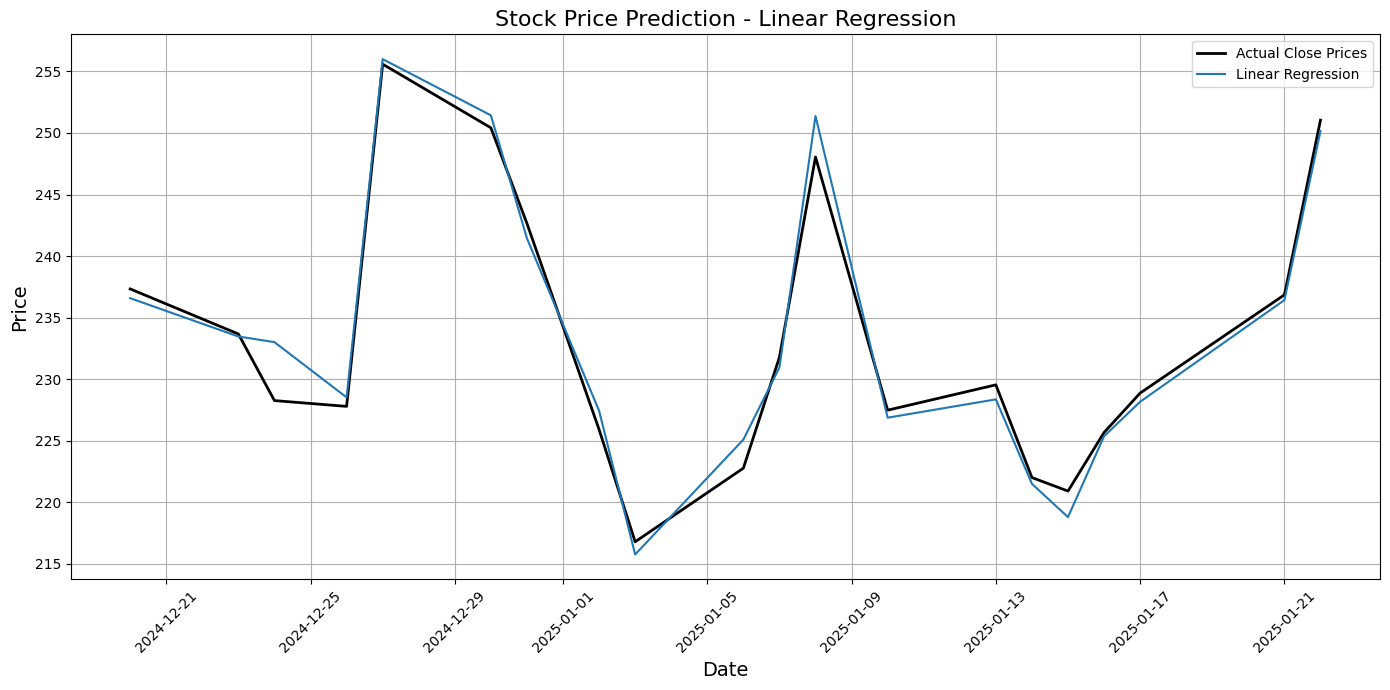

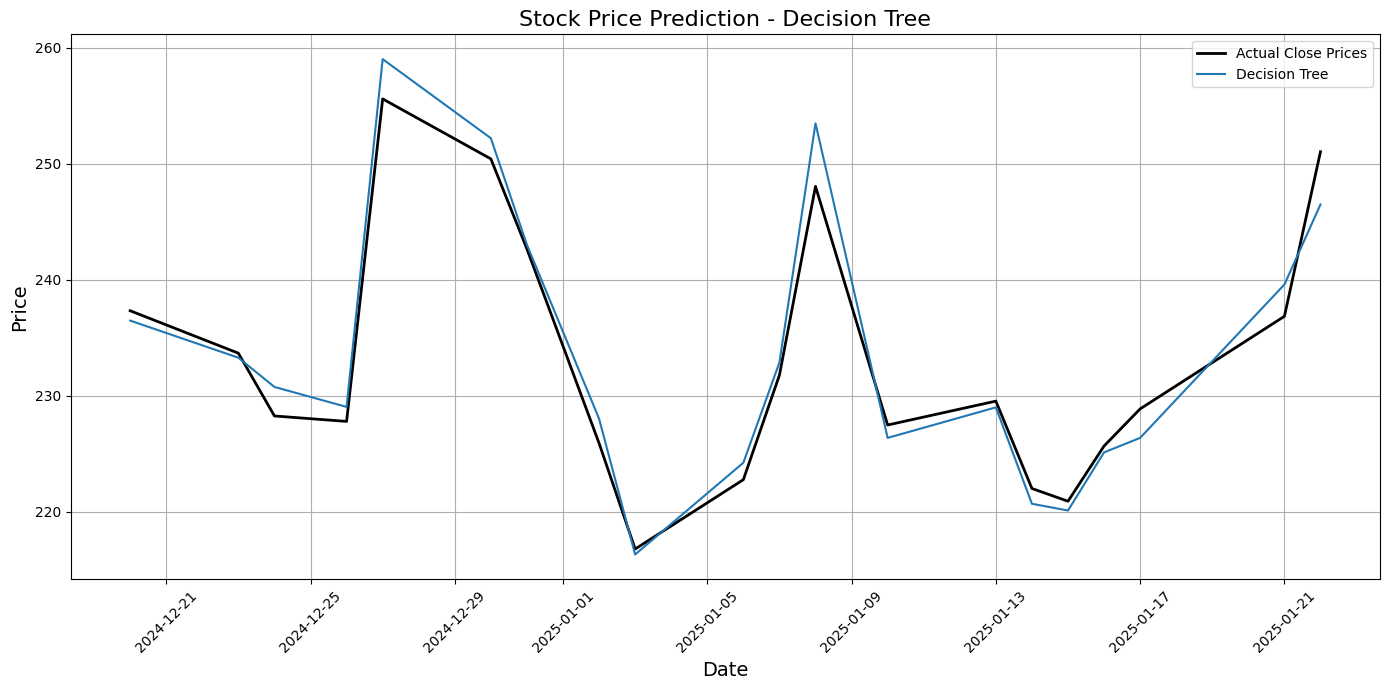

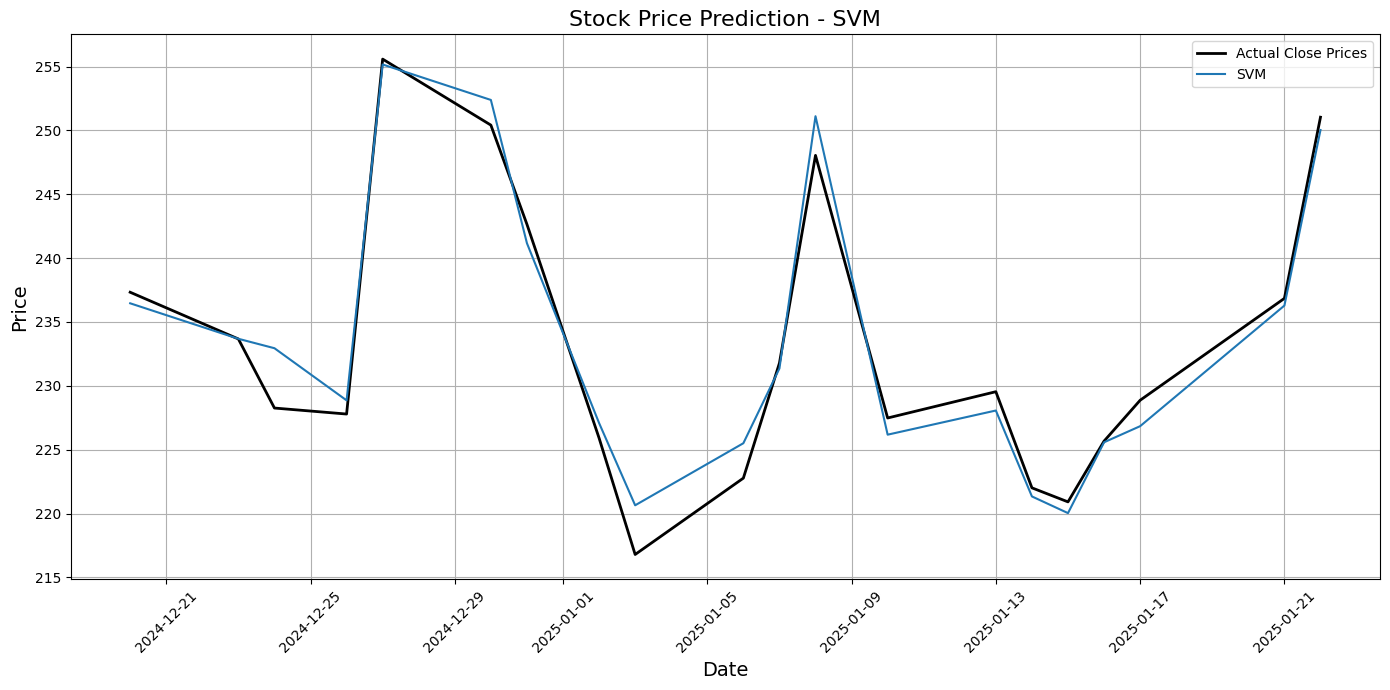

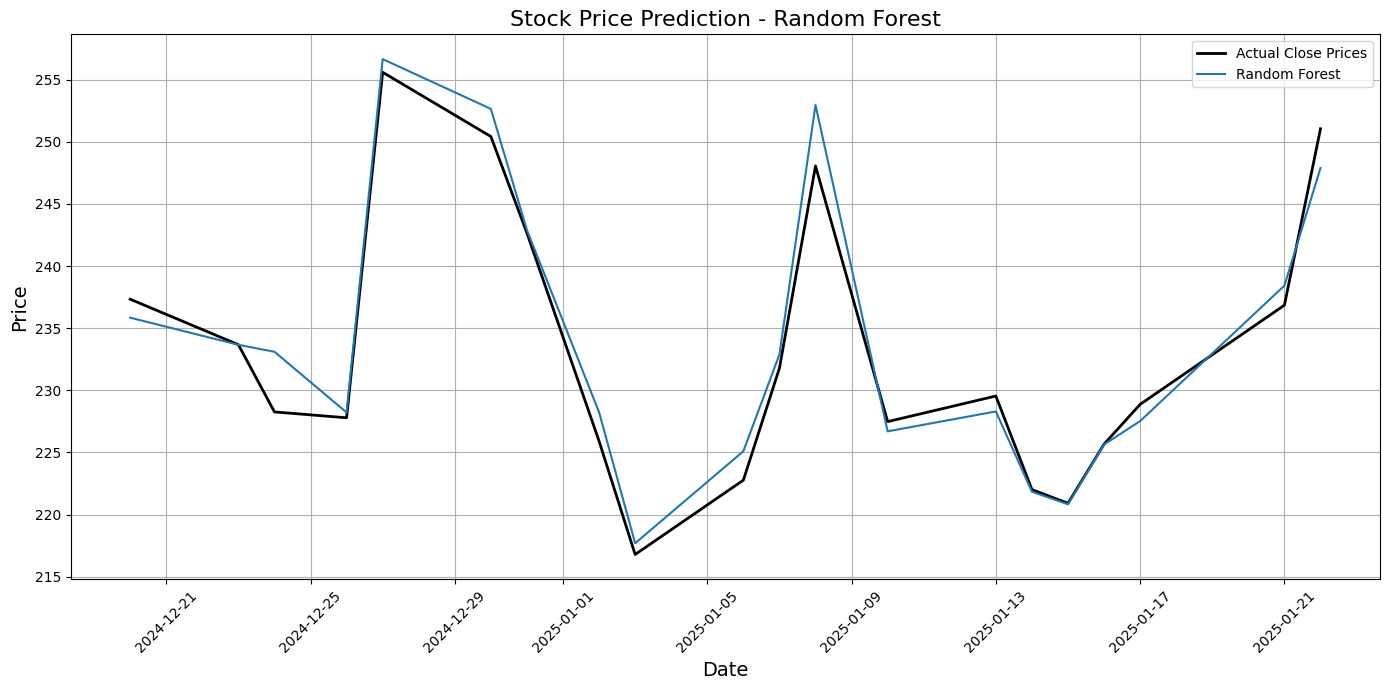

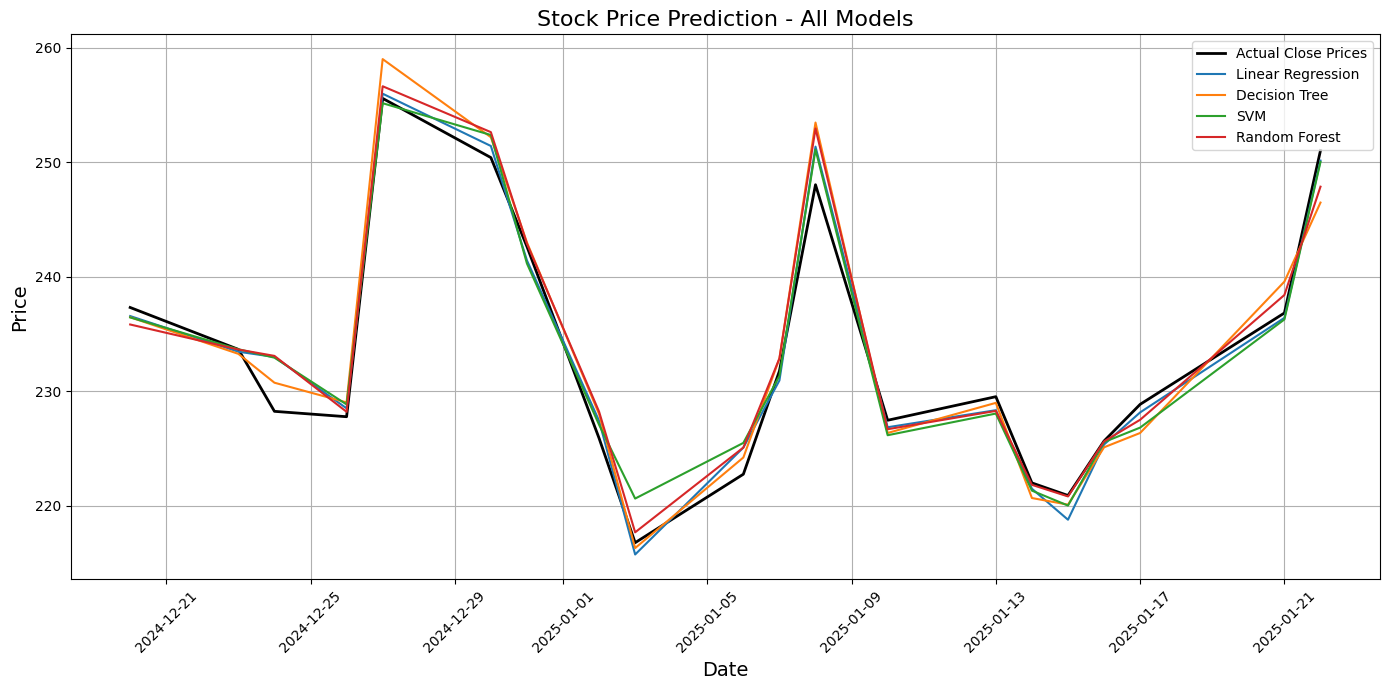

In [26]:
# Imputation for filling missing values
imputer = SimpleImputer(strategy='mean')  # Choosing imputation strategy
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Normalizing features
scaler = StandardScaler()

# Normalizing for linear model
X_train_lr = scaler.fit_transform(X_train)
X_test_lr = scaler.transform(X_test)

# Normalizing for decision tree model
X_train_dt = scaler.fit_transform(X_train)
X_test_dt = scaler.transform(X_test)

# Normalizing for SVM model
X_train_svm = scaler.fit_transform(X_train)
X_test_svm = scaler.transform(X_test)

# Normalizing for random forest model
X_train_rf = scaler.fit_transform(X_train)
X_test_rf = scaler.transform(X_test)

# Defining models and hyperparameters for Grid Search
models = {
    'Linear Regression': (LinearRegression(), {}),
    'Decision Tree': (DecisionTreeRegressor(), {'max_depth': [None, 5, 10, 15]}),
    'SVM': (SVR(), {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto']}),
    'Random Forest': (RandomForestRegressor(n_estimators=100), {'max_depth': [None, 5, 10, 15], 'min_samples_split': [2, 5]})
}

# Storing results
results = {}

# Training and evaluating each model
for name, (model, params) in models.items():
    # Selecting normalized data based on the model type
    if name == 'Linear Regression':
        X_train_model = X_train_lr
        X_test_model = X_test_lr
    elif name == 'Decision Tree':
        X_train_model = X_train_dt
        X_test_model = X_test_dt
    elif name == 'SVM':
        X_train_model = X_train_svm
        X_test_model = X_test_svm
    elif name == 'Random Forest':
        X_train_model = X_train_rf
        X_test_model = X_test_rf

    # Grid Search
    grid_search = GridSearchCV(model, params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train_model, y_train)
    
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test_model)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mean_cv_score = -grid_search.best_score_   # Convert to positive MSE
    results[name] = (y_pred, mse, mae, r2, mean_cv_score, grid_search.best_params_)


# Defining a list to store results
results_list = []

# Collecting results
for name, (y_pred, mse, mae, r2, mean_cv_score, best_params) in results.items():
    results_list.append({
        'Model': name,
        'MSE': mse,
        'MAE': mae,
        'R²': r2,
        'CV MSE': mean_cv_score,
        'Best Params': str(best_params)  # تبدیل به رشته برای ذخیره‌سازی
    })

# Creating DataFrame from the results list
results_df = pd.DataFrame(results_list)

# Displaying the results table
print(results_df)

# Saving output to a CSV file
results_df.to_csv('stock_price_prediction_results.csv', index=False)

# Plotting results for each model separately
for name, (y_pred, mse, mae, r2, mean_cv_score, best_params) in results.items():
    plt.figure(figsize=(14, 7))
    
    # Actual data
    plt.plot(data.index[-len(y_test):], y_test, color='black', label='Actual Close Prices', linewidth=2)
    
    # Model predictions
    plt.plot(data.index[-len(y_test):], y_pred, label=name, linewidth=1.5)
    
    # Improving chart readability
    plt.title(f'Stock Price Prediction - {name}', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Price', fontsize=14)
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plotting a combined chart for all models
plt.figure(figsize=(14, 7))

# Actual data
plt.plot(data.index[-len(y_test):], y_test, color='black', label='Actual Close Prices', linewidth=2)

# Predictions from all models
for name, (y_pred, _, _, _, _, _) in results.items():
    plt.plot(data.index[-len(y_test):], y_pred, label=name, linewidth=1.5)

# Improving overall chart readability
plt.title('Stock Price Prediction - All Models', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()  # Prevent title clipping
plt.show()